###  Subash Chandra Biswal (U77884251)

## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [32]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [13]:
mnist.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])
print(mnist.target[7])
print(mnist.target[8])
print(mnist.target[9])

0
1
2
3
4
5
6
7
8
9


We can use matplotlib to display a sample of these images from the data.

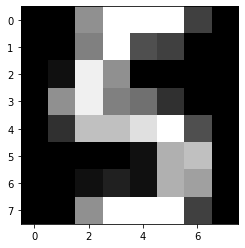

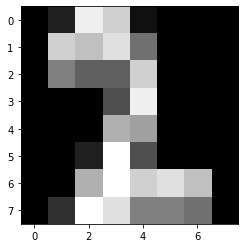

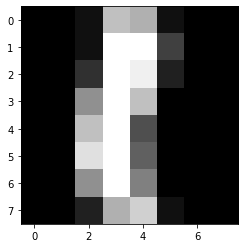

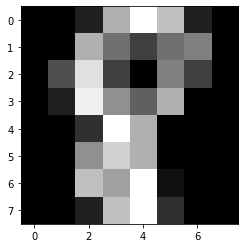

In [26]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

### Neural Net

In [28]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 547 ms
Wall time: 4.07 s


In [29]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 4 ms


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       0.97      1.00      0.99        36
           3       0.95      0.98      0.96        41
           4       0.95      0.97      0.96        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       0.97      0.95      0.96        37
           8       0.96      0.93      0.95        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## With RandomizedSearchCV

In [22]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (70,), 'alpha': 0.5, 'activation': 'tanh'}
CPU times: total: 4.17 s
Wall time: 5min 47s


In [33]:
%%time

score_measure = "accuracy"
kfolds = 5
xgboost = XGBClassifier()

param_grid_xg = {  
    'max_depth': range (2, 10, 1),
    'n_estimators': [10,50,250,1000,2000],
    'learning_rate': [1.0,0.2,0.1, 0.01, 0.05],}   

rand_search_xg = RandomizedSearchCV(estimator = xgboost, param_distributions=param_grid_xg, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

# XGBoost Classifier model fit for grid search
_ = rand_search_xg.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_xg.best_score_}")
print(f"... with parameters: {rand_search_xg.best_params_}")

bestRecallXg = rand_search_xg.best_estimator_

C:\Users\scbis\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 200 is smaller than n_iter=500. Running 200 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
The best accuracy score is 0.9631339527680991
... with parameters: {'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.2}
CPU times: total: 27.8 s
Wall time: 20min 39s


In [34]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.93      0.96        29
           9       0.94      0.97      0.96        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

CPU times: total: 0 ns
Wall time: 9.22 ms


In [41]:
%%time
y_pred = bestRecallXg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.97      1.00      0.99        35
           2       1.00      0.97      0.99        36
           3       1.00      0.95      0.97        41
           4       0.95      1.00      0.97        38
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.94      0.91      0.93        34

    accuracy                           0.97       360
   macro avg       0.96      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

CPU times: total: 125 ms
Wall time: 35.5 ms


## With GridSearchCV

In [37]:
%%time

score_measure = "accuracy"
kfolds = 5

{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (70,), 'alpha': 0.5, 'activation': 'tanh'}

param_grid = {
    'hidden_layer_sizes': [(50,), (70,), (90,)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.3 ,.5, .7],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.0001,0.001,0.005],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'activation': 'tanh', 'alpha': 0.3, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant', 'learning_rate_init': 0.005, 'max_iter': 5000, 'solver': 'adam'}
CPU times: total: 1.42 s
Wall time: 2min 44s


In [40]:
%%time
 {'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 0.2}
score_measure = "accuracy"
kfolds = 5
xgboost = XGBClassifier()

param_grid_xg = {  
    'max_depth': [1,2,3],
    'n_estimators': [700, 1000, 1300],
    'learning_rate': [0.1,0.2,0.1],}   

grid_search_xg = GridSearchCV(estimator = xgboost, param_grid=param_grid_xg, cv=kfolds,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

# XGBoost Classifier model fit for grid search
_ = grid_search_xg.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_xg.best_score_}")
print(f"... with parameters: {grid_search_xg.best_params_}")

bestRecallXg = grid_search_xg.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
The best accuracy score is 0.9631339527680991
... with parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 1000}
CPU times: total: 39.1 s
Wall time: 4min 28s


In [39]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

CPU times: total: 0 ns
Wall time: 25.4 ms


In [42]:
%%time
y_pred = bestRecallXg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.97      1.00      0.99        35
           2       1.00      0.97      0.99        36
           3       1.00      0.95      0.97        41
           4       0.95      1.00      0.97        38
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       0.90      0.93      0.92        29
           9       0.94      0.91      0.93        34

    accuracy                           0.97       360
   macro avg       0.96      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

CPU times: total: 93.8 ms
Wall time: 33.4 ms


## Analysis

I have used XGBoost as the second model for this classification dataset. Its observed that neural network model performed better (Accuracy = 0.98) than XGBoost (Accuracy = 0.97) for both random grid search and grid search. Though neural network takes bit more time than XGBoost, its worth it.